# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 570
["la'ie", 'invercargill', 'amga', 'piacabucu', 'puerto natales', 'badger', 'college', 'edinburgh of the seven seas', 'blackmans bay', 'curvelo', 'port-aux-francais', 'khandyga', 'cabo san lucas', 'masaka', 'olonkinbyen', 'whitehorse', 'slupca', 'grytviken', 'albany', 'miyang', 'nuuk', 'iqaluit', 'ribeira grande', 'sinop', 'jamestown', 'adamstown', 'island harbour', 'lawas', 'tindouf', 'sur', 'eldorado', 'primero de mayo', 'kalifornsky', 'west island', 'christchurch', 'atafu village', 'bredasdorp', 'talnakh', 'yellowknife', 'lihue', 'harnosand', 'port mathurin', 'khorugh', 'port elizabeth', 'uttaradit', 'fale old settlement', 'road town', 'waddan', 'georgetown', 'hamilton', 'novodvinsk', 'stanley', 'jaguaruna', 'saipan', 'hithadhoo', 'nova sintra', 'thompson', 'bethel', 'uturoa', 'fisterra', 'shimoda', 'noshiro', 'tazovsky', 'kununurra', 'souillac', 'gadzhiyevo', 'la passe', 'media luna', 'mulki', 'baiao', 'yuzhno-kurilsk', 'la tuque', 'tiksi', 'waitang

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_url =f"{base_url}q=london&appid={weather_api_key}&units=metric"
print(city_url)
# city_url = requests.get(base_url)
response_city=requests.get(city_url)
print(response_city)
# print(json.dumps(response_city,indent=4,sort_keys=True))
#f"{base_url}appid={weaf"{base_url}appid={weather_api_key}&city={city_data}&q="ther_api_key}&city={city_data}&q="

https://api.openweathermap.org/data/2.5/weather?q=london&appid=9cdc9fc0c34af35f3d3592d14845a774&units=metric
<Response [200]>


In [5]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    response = requests.get(f"{base_url}q={city}&appid={weather_api_key}&units=metric")

    weather_data= response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_data["weather"]
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data["coord"]["lat"]
        city_lng = weather_data["coord"]["lon"]
        city_max_temp = weather_data["main"]["temp_max"]
        city_humidity = weather_data["main"]["humidity"]
        city_clouds = weather_data["clouds"]["all"]
        city_wind = weather_data["wind"]["speed"]
        city_country = weather_data["sys"]["country"]
        city_date = weather_data["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city,
                           "Lat": city_lat,
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la'ie
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | amga
Processing Record 4 of Set 1 | piacabucu
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | curvelo
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | masaka
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | slupca
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | miyang
Processing Record 21 of Set 1 | nuuk
Processing Record 22 of Set 1 | iqaluit
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la'ie,21.6477,-157.9253,27.66,75,47,5.09,US,1737856058
1,invercargill,-46.4000,168.3500,16.12,81,100,4.47,NZ,1737856060
2,amga,60.8953,131.9608,-26.17,97,100,1.66,RU,1737856061
3,piacabucu,-10.4056,-36.4344,26.08,80,15,4.37,BR,1737856062
4,puerto natales,-51.7236,-72.4875,11.14,82,100,1.27,CL,1737856063


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la'ie,21.6477,-157.9253,27.66,75,47,5.09,US,1737856058
1,invercargill,-46.4000,168.3500,16.12,81,100,4.47,NZ,1737856060
2,amga,60.8953,131.9608,-26.17,97,100,1.66,RU,1737856061
3,piacabucu,-10.4056,-36.4344,26.08,80,15,4.37,BR,1737856062
4,puerto natales,-51.7236,-72.4875,11.14,82,100,1.27,CL,1737856063


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

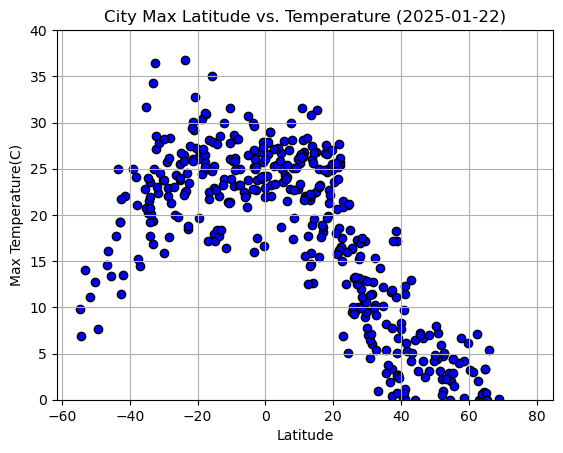

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter((city_data_df["Lat"]),(city_data_df["Max Temp"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.ylim(0,40)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

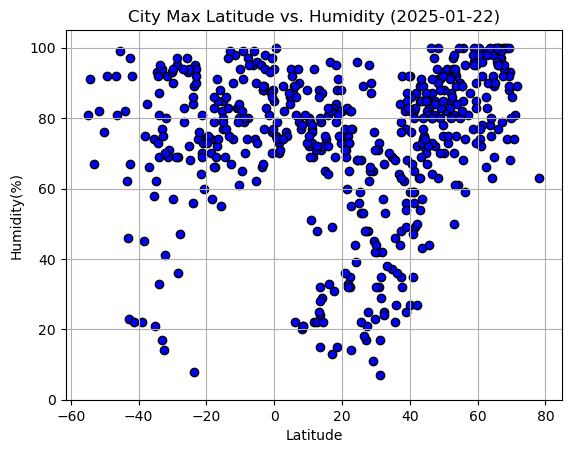

In [11]:
# Build scatter plot for latitude vs. Humidity
plt.scatter((city_data_df["Lat"]),(city_data_df["Humidity"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(0,105)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

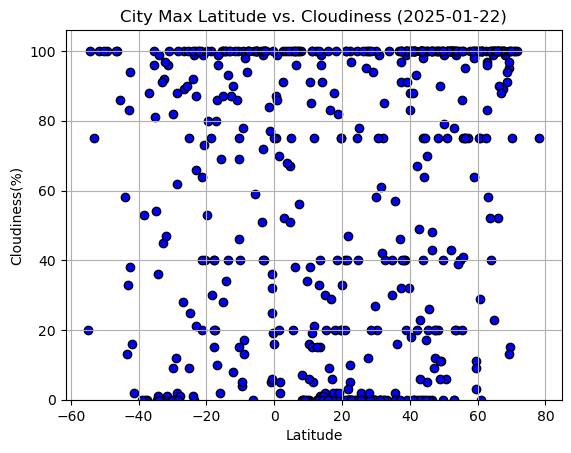

In [12]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter((city_data_df["Lat"]),(city_data_df["Cloudiness"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim(0,106)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

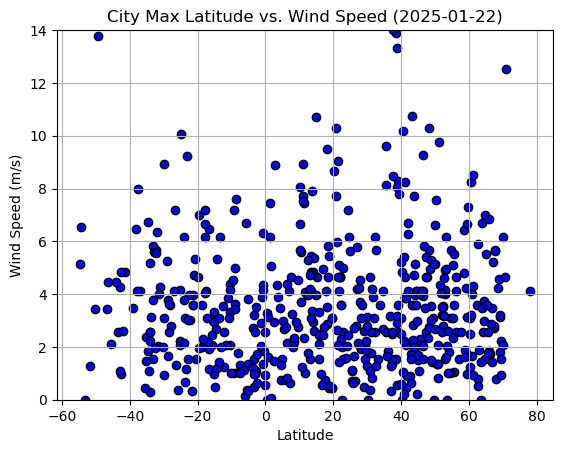

In [13]:
# Build scatter plot for latitude vs. Wind speed
plt.scatter((city_data_df["Lat"]),(city_data_df["Wind Speed"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim(0,14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la'ie,21.6477,-157.9253,27.66,75,47,5.09,US,1737856058
2,amga,60.8953,131.9608,-26.17,97,100,1.66,RU,1737856061
5,badger,64.8000,-147.5333,3.32,89,100,1.54,US,1737856064
6,college,64.8569,-147.8028,3.37,90,100,1.54,US,1737856039
11,khandyga,62.6667,135.6000,-31.12,99,97,0.77,RU,1737856072


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,16.12,81,100,4.47,NZ,1737856060
3,piacabucu,-10.4056,-36.4344,26.08,80,15,4.37,BR,1737856062
4,puerto natales,-51.7236,-72.4875,11.14,82,100,1.27,CL,1737856063
7,edinburgh of the seven seas,-37.0676,-12.3116,14.42,66,88,4.11,SH,1737856067
8,blackmans bay,-43.0167,147.3167,19.18,46,33,4.28,AU,1737856068


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6986001536387642


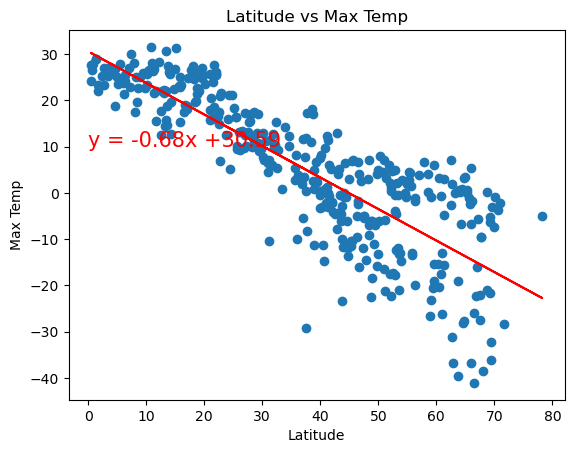

In [17]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.1837998542747602


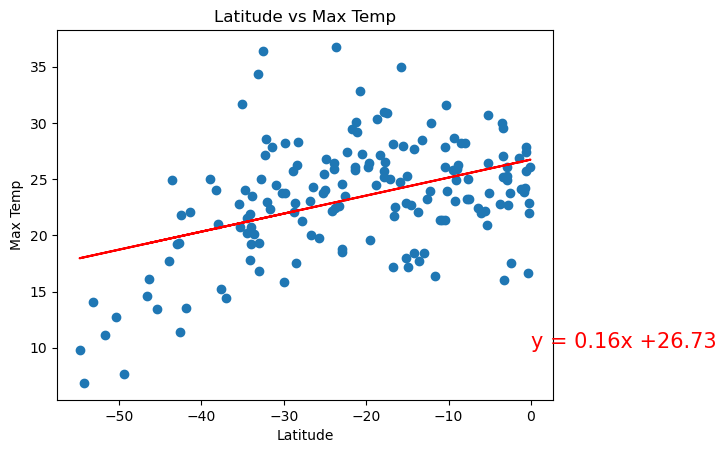

In [18]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 


The correlation found in the chart temperature vs. latitude (Northern_hemi 0.7298831639910319 & Southern_hemi  0.33872242309720185) 
are positive this means that as latitude increases, temperature also tends to increase which could be the case near the poles,
in some specific regions.
Also the strength of the correlation can vary depending on geographic location, season, and other environmental factors


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.13105760223268115


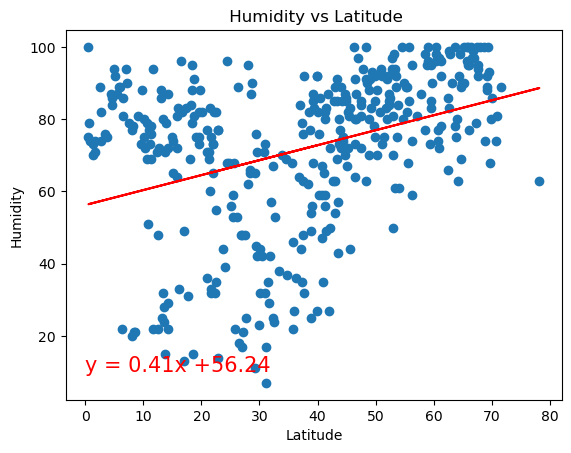

In [19]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f" Humidity vs Latitude")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.07178831302853807


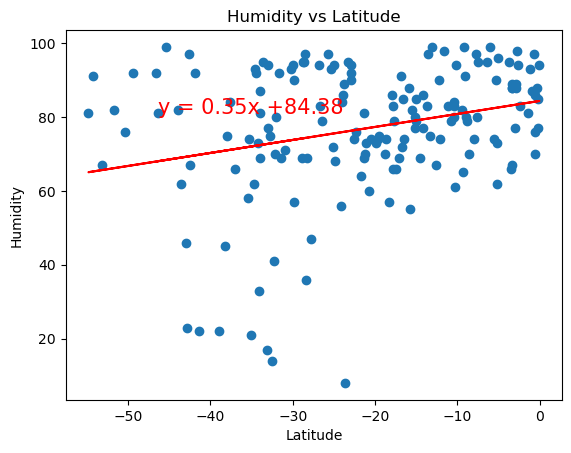

In [20]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq,(x_values.iloc[0], y_values.iloc[0]),fontsize=15,color="red")
plt.title(f"Humidity vs Latitude")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the Linear Relationship**:

The correlation found in the chart between humidity and latitude (Northern Hemisphere:  0.1371217320872958, Southern Hemisphere: 0.03874190741854498) is positive. This suggests that, generally, humidity is higher near the Equator and lower towards the poles, particularly in polar climates. We can conclude that as latitude increases, humidity tends to decrease, especially near the poles where the air is cold, dry, and holds less moisture.

However, the strength of this correlation can vary depending on geographic location, season, and other environmental factors. For example, coastal regions may have higher humidity regardless of their latitude due to the nearby ocean. Similarly, forested regions like the Amazon, which are close to the Equator, may also have higher humidity despite their proximity to the Equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.12488628606154624


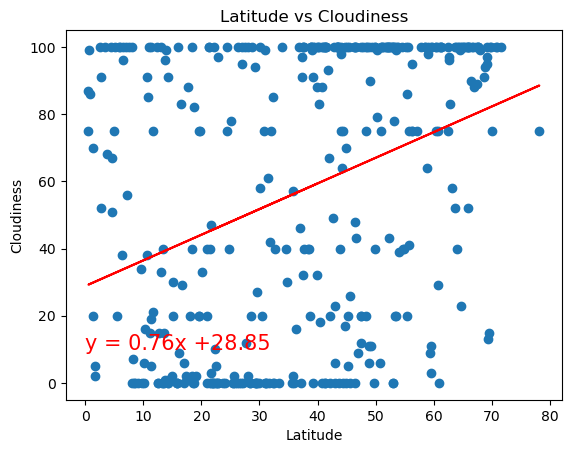

In [21]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.0178650693406415


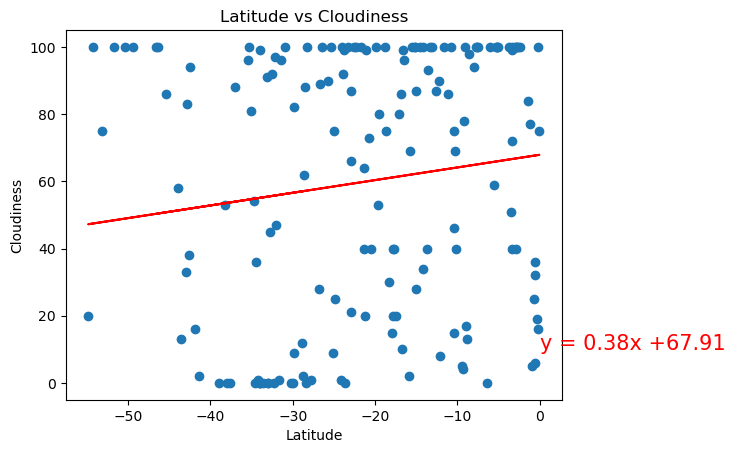

In [22]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Also, the strength of the correlation between latitude and cloudiness can vary depending on geographic location, season, and other environmental factors. However, considering the general trends: near the Equator (0° latitude), cloud cover tends to be higher because high temperatures cause more evaporation. In contrast, polar regions (above 60° latitude) tend to have lower cloud cover, as cold air holds less moisture, making cloud formation less frequent.

Given this background, in this analysis, the correlation values for the Northern Hemisphere (0.057172886349690887) and the Southern Hemisphere (0.0021819017018207647) are both closest to 0. This suggests that as latitude increases, cloudiness also increases, though the correlation is quite weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.003388633467889413


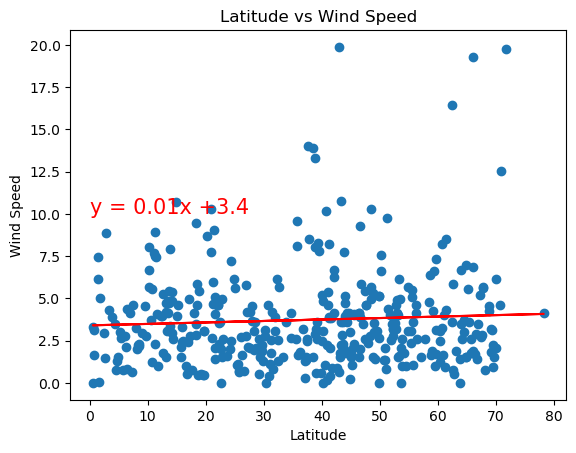

In [23]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.05240604394726873


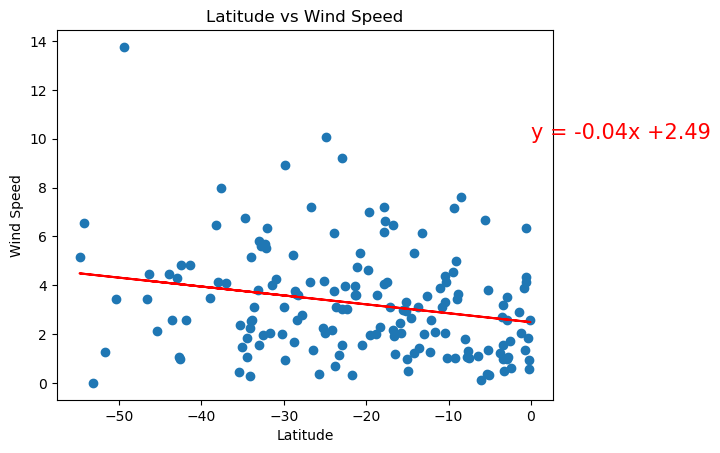

In [24]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 


In regions closest to the Equator (0° Latitude), the air is generally calm because warm air rises due to the high temperatures, resulting in lower wind speeds.
As the latitude increases, wind speeds tend to become more frequent and stronger. 
In this correlation, the Northern Hemisphere has a value of 0.0035, and the Southern Hemisphere has a value of 0.0794. 
Both hemispheres show a positive correlation, meaning that as latitude increases, wind speeds also increase, can vary depending on geographic location, season, and other environmental factors. As we can observed the correlation on the North hemisphere is closest to 0 means there is not a clear correlation on the chart.